<a href="https://colab.research.google.com/github/sachinac/MSDS7333/blob/main/msds_7333_case_study04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Influenza** most commonly known as **flu** is an infectious respiratory disease caused by virus. There four known variants of the Influenza. Type A , Type B, Type C and Type D. Based on historical data it occurs in winter or in monsoon season. There are several studies have been conducted on the causes of occurring in the specific season and one of the study has linked it to vitamin D levels in human $^{[1]}$. It's during winter or rainy season when people stay mostly indoors and are less expose to sun causing the fall of levels of vitamin D in people. Staying inside homes has also been seen as one of the reason of transmission the disease as people are in close contact of each other. That explains a bit of seasonal occurrence of the flu every year. These viruses infect nose, throat and lungs and leads to mild to severe illness and has been observed that it can also lead to death of proper attention is not given.

   Data shows that globally on an average 389K deaths occurs due to flu and it mostly affect people who are above 60 years of age $^{[2]}$. In the United States alone more than 200K hospitalization are due to Influenza every year $^{[3]}$. [Centers for Disease Control and Prevention](https://www.cdc.gov/) has reported range of death is between 3500 and 49K every year and costs the U.S. economy more than \$10 billions $^{[4]}$.Out of many strains of the viruses few have potential to create pandemics/epidemics. One the deadliest pandemic occurred in year 1918 which infected 33% of the world population and caused 100 million deaths worldwide. It has been observed that such or less severe pandemic occurs 3 times in a century. As this is repeating phenomenon it becomes important to gather data on infection to take precautionary steps to contain the impact of virus to protect most vulnerable population. It helps to control and respond proactively to spread of the disease, arranging medical treatments accordingly and alert health officials in advance which potentially stops to become pandemic.

World Health Organization (WHO) plays an important role in keeping watch on such diseases as it occurs across the world. They established [Global Influenza Surveillance and Response System (GISRS)](http://www.who.int/influenza/gisrs_laboratory/en/) in 1952 to monitor Influenza and different strains and changes in viruses with the goal of reducing its impact and providing guidance to researchers to develop/enhance vaccine. Centers for Disease Control and Prevention and WHO works together to contain the virus and protect older population in the country.

With this initial background this case study provides different insights from the [data](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html) that is publicly available on WHO's website. Study will analyze trends in the data to develop model to 2 week forecast of infections details of which is available in later section of this document.

# Business Understanding

The Influenza causes significant impact on the economy and puts additional burden health system every year. According to data adults with certain medical conditions and people above 60 years of age particularly affected by flu badly the end results in hospitalization. Sudden increase in patients puts pressure on Hospitals, Doctors, nurses and eventually affects treatments of patients. Knowing that such a diseases occurs every year requires monitoring, data collection and planning. There are several ways to control getting into such situation. Once of the way is vaccination before winter or monsoon starts, spreading awareness , face-masking etc. Another way to go one step further and provide forecast so that preventive actions can be taken at right time.Forecast can provide guidence to logistics for healthcare, e.g. start time of vaccinations, medical staff, arranging medicines, medical equipmments only when it is needed, alerting citizens to take precautionary steps like washing hands, physical distancing, using face masks etc. Which eventually may help to reduce number of patients and in turn pressure on health agencies. Therefore it is important to monitor such diseases by the way of collecting health data on regular basis so that preventive actions can be taken, to alert Health organizations in advance. THe goal of this case study is to obtain data that WHO has collected over the years and build and evaluate a model that will accurately forecast incidences of Influenza.

## Objective

Download historical [data](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html) that is available on the WHO website and build and evaluate a time series model (ARIMA) to provide accurate forecast of Influenza incidences.



# Data Extraction & Evaluation

Data was downloaded from [www.cdc.gov](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html). This is weekly outpatient data from Influenza-like Illness Surveillance Network, or **ILINet** which contains number of providers and patients and other stats for whole year starting from week 40 of year 1997 to week 6 of year 2021. Total observations in this dataset are 1217. US Centers for Disease Control and Prevention and state health departments collects influensa surveillance data collected from healthcare providers.



## Loading Summerizing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/sachinac/MSDS7333/main/case_study04/data/ILINet.csv"
fludata=pd.read_csv(url)
fludata.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


## Structure of the data

In [ ]:
fludata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGION TYPE        1220 non-null   object 
 1   REGION             1220 non-null   object 
 2   YEAR               1220 non-null   int64  
 3   WEEK               1220 non-null   int64  
 4   % WEIGHTED ILI     1220 non-null   float64
 5   UNWEIGHTED ILI     1220 non-null   float64
 6   AGE 0-4            1220 non-null   int64  
 7   AGE 25-49          1220 non-null   object 
 8   AGE 25-64          1220 non-null   object 
 9   AGE 5-24           1220 non-null   int64  
 10  AGE 50-64          1220 non-null   object 
 11  AGE 65             1220 non-null   int64  
 12  ILITOTAL           1220 non-null   int64  
 13  NUM. OF PROVIDERS  1220 non-null   int64  
 14  TOTAL PATIENTS     1220 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 143.1+ KB


## Data Summary

In [ ]:
fludata.describe()

,YEAR,WEEK,% WEIGHTED ILI,UNWEIGHTED ILI,AGE 0-4,AGE 5-24,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03
mean,2008.928689,26.703279,1.773753,1.700802,2771.085246,4035.495082,697.329508,10926.902459,1311.213934,5.219077e+05
std,6.758509,15.187550,1.431055,1.340334,3087.588240,5613.912368,1014.761232,14282.927124,813.032039,3.850975e+05
min,1997.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2003.000000,13.750000,0.879713,0.890790,602.000000,751.750000,137.750000,2149.250000,606.000000,1.675415e+05
50%,2009.000000,27.000000,1.342605,1.280695,1896.000000,2340.000000,375.000000,6592.000000,1356.500000,5.402825e+05
75%,2015.000000,40.000000,2.257150,2.103883,3739.250000,4904.750000,753.500000,14068.500000,1921.250000,7.794160e+05
max,2021.000000,53.000000,7.715100,7.780900,24097.000000,45513.000000,6986.000000,111361.000000,3435.000000,1.635350e+06


## Plot the data

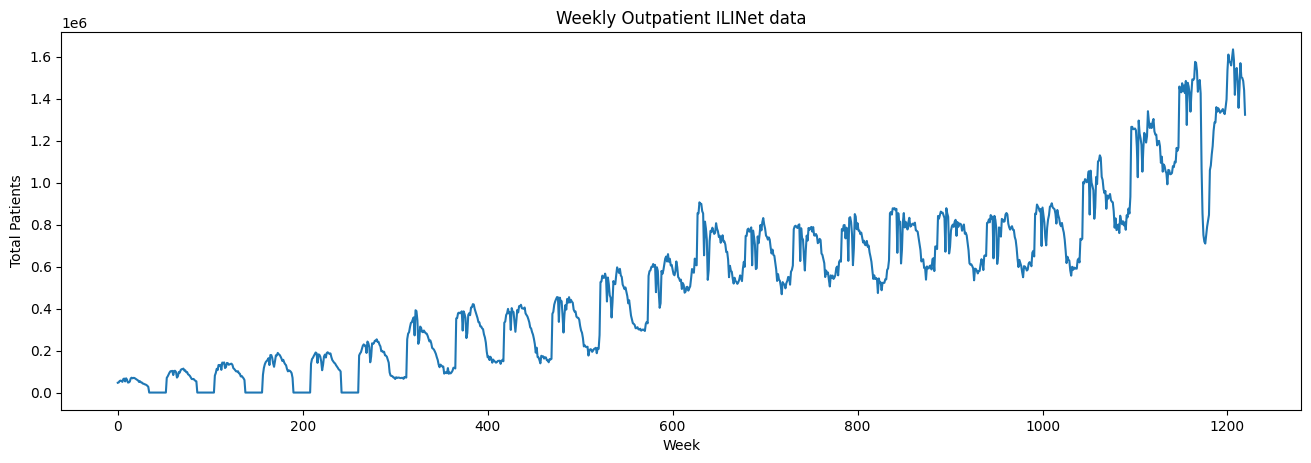

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Week', ylabel='Total Patients', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(fludata, x=fludata.index, y=fludata.iloc[:,14], title='Weekly Outpatient ILINet data')  

## Missing Values

As it happens with traditional dataset, missing data prolem also occurs with time series data and if it occurs it must be handled before the data can be further preprocessed and analyzed. Sometimes the missing records are a part of the dynamics of the time series, for example, a stock market closes on a Friday and opens on a Monday. This case study is about Influenza incidences every year. So it is known fact that this is seasonal occurence so data may not be collected or it is not at all available for the period when there is no outbreak. **As per indicated below the dataset doesn't contain a missing values**.

The statistical characteristics of time series data often violate the assumptions of conventional statistical methods. Because of this, analyzing time series data requires a unique set of tools and methods, collectively known as time series analysis.

## Assumptions and Constraints

* Our data clearly indicates that the flu patient are increaing from year to year. this make sense because, world population is increasing, thus the number of people having the flu is also rising every year. The other thing is the seasonality of this data is also clearly visible. In some week the incidences are high and some week it drops. 
* This case stduy intends to perform univariate analysis as there are no other variables involved in the dataset that may have impact on total number of patients every year.


# References

1.  Cannell JJ, Vieth R, Umhau JC, Holick MF, Grant WB, Madronich S, et al. (December 2006). "Epidemic influenza and vitamin D". Epidemiology and Infection. 134 (6): 1129–40. doi:10.1017/S0950268806007175. PMC 2870528. PMID 16959053.
2. Paget J, Spreeuwenberg P, Charu V, Taylor RJ, Iuliano AD, Bresee J, et al. (December 2019). "Global mortality associated with seasonal influenza epidemics: New burden estimates and predictors from the GLaMOR Project". Journal of Global Health. 9 (2): 020421. doi:10.7189/jogh.09.020421. PMC 6815659. PMID 31673337.
3.  Thompson WW, Shay DK, Weintraub E, Brammer L, Cox N, Anderson LJ, et al. (January 2003). "Mortality associated with influenza and respiratory syncytial virus in the United States". JAMA. 289 (2): 179–86. doi:10.1001/jama.289.2.179. PMID 12517228. S2CID 5018362.
4. [Small Business and Technology Development Center article ](https://sbtdc.org/resources/recovery/pandemic-flu/)